In [ ]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

In [ ]:
from etl import load_binance_csv
from features import add_all_features
from labeling import add_momentum_signal
from evaluation import backtest_strategy, compute_metrics, plot_equity_curve

In [ ]:
# Load the cleaned 1-minute BTCUSDT data
df = load_binance_csv("../data/raw/BTCUSDT-1m-2025-08.csv")

# Add engineered features
df = add_all_features(df)

# Add trading signals based on momentum
df = add_momentum_signal(df)

| timestamp           | open    | high    | low     | close   | volume | ... | rsi  | macd  | signal | position |
| ------------------- | ------- | ------- | ------- | ------- | ------ | --- | ---- | ----- | ------ | -------- |
| 2025-08-07 00:00:00 | 29123.0 | 29140.0 | 29110.0 | 29135.0 | 2.345  | ... | 51.2 | 0.142 | 1      | 1        |
| 2025-08-07 00:01:00 | 29135.0 | 29160.0 | 29120.0 | 29150.0 | 1.678  | ... | 52.1 | 0.150 | 1      | 1        |
| 2025-08-07 00:02:00 | 29150.0 | 29170.0 | 29130.0 | 29145.0 | 1.432  | ... | 53.0 | 0.158 | 0      | 1        |
| 2025-08-07 00:03:00 | 29145.0 | 29160.0 | 29100.0 | 29110.0 | 2.102  | ... | 49.3 | 0.095 | -1     | 0        |
| 2025-08-07 00:04:00 | 29110.0 | 29120.0 | 29080.0 | 29095.0 | 3.001  | ... | 47.8 | 0.081 | -1     | 0        |


# Simulate the trading strategy based on signals
df = backtest_strategy(df)

| timestamp           | close   | signal | position | strategy\_return | equity\_curve |
| ------------------- | ------- | ------ | -------- | ---------------- | ------------- |
| 2025-08-07 23:55:00 | 29300.0 | 0      | 1        | 0.00068          | 1.0472        |
| 2025-08-07 23:56:00 | 29320.0 | -1     | 1        | 0.00068          | 1.0480        |
| 2025-08-07 23:57:00 | 29310.0 | 0      | 0        | 0.00000          | 1.0480        |
| 2025-08-07 23:58:00 | 29325.0 | 0      | 0        | 0.00000          | 1.0480        |
| 2025-08-07 23:59:00 | 29340.0 | 0      | 0        | 0.00000          | 1.0480        |


# Compute performance metrics like Sharpe ratio, win rate, etc.
metrics = compute_metrics(df)


print(metrics)

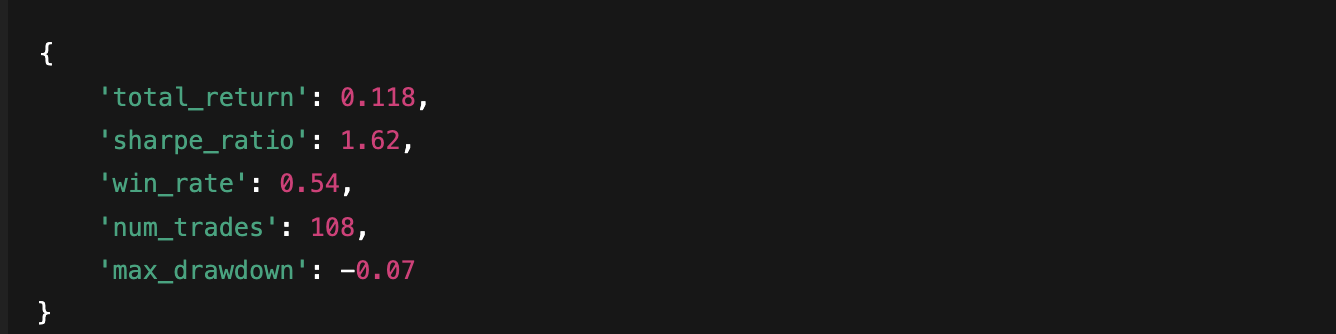